# **Author: Niraj Kulkarni** 

## **INTERMEDIATE LEVEL TASK** 

### **Prediction using Decision Tree Algorithm**
### **Problem Statement: From the given 'Iris' dataset create a Decision Tree Classifier and represent it graphically.**
### **IDE used: Jupyter Notebook**

In [3]:
#Importing the liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn.metrics as metrics

### **Reading the data**

In [4]:
iris = pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

### There are 3 types of Species

### **Creating a species class of different species**

In [8]:
iris['Species_class']=np.where(iris.Species=='Iris-virginica',1,np.where(iris.Species=='Iris-versicolor',2,3))
iris.Species_class.value_counts()

1    50
2    50
3    50
Name: Species_class, dtype: int64

In [9]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'Species_class'],
      dtype='object')

### **Renaming the columns**

In [10]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

### **Creating our Model**

In [11]:
#Spliting the model into training and testing set
train_X, test_X, train_y, test_y = train_test_split(iris[cols], iris['Species_class'], test_size=0.2, random_state=123)

In [13]:
param_grid = {'max_depth': np.arange(2,8),
             'max_features': np.arange(2,5)}

In [14]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, verbose=1, n_jobs=-1)
tree.fit(train_X, train_y)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': array([2, 3, 4])},
             verbose=1)

In [15]:
tree.best_score_

0.9749999999999999

In [16]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=2)

In [17]:
tree.best_params_

{'max_depth': 4, 'max_features': 2}

In [18]:
train_pred = tree.predict(train_X)

In [19]:
test_pred = tree.predict(test_X)

In [20]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           1       1.00      0.82      0.90        11
           2       0.75      1.00      0.86         6
           3       1.00      1.00      1.00        13

    accuracy                           0.93        30
   macro avg       0.92      0.94      0.92        30
weighted avg       0.95      0.93      0.93        30



### **As we can see the model accuracy is 93 percent**

## **Building the Final Decision Tree Modle**

In [21]:
clf_tree = DecisionTreeClassifier(max_depth=4, max_features=2)
clf_tree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=4, max_features=2)

In [24]:
#Predicting the results
tree_test_pred = pd.DataFrame({'Actual': test_y, 'Predicted': clf_tree.predict(test_X)})
tree_test_pred.sample(n=15)

,Actual,Predicted
88,2,2
141,1,1
8,3,3
117,1,1
72,2,1
31,3,3
135,1,1
121,1,1
45,3,3
42,3,3


In [26]:
metrics.accuracy_score( tree_test_pred.Actual, tree_test_pred.Predicted) #Accuracy Score

0.9666666666666667

### **Creating a Heatmap of the confusion matrix**

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Text(0.5, 15.0, 'Predicted Label')

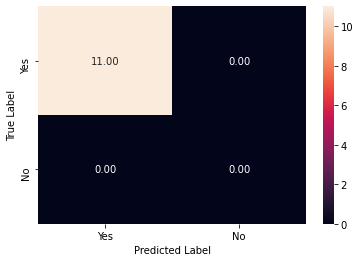

In [27]:
tree_cm = metrics.confusion_matrix(tree_test_pred.Predicted, tree_test_pred.Actual, [1,0]) #Creating the confusion matrix
sns.heatmap(tree_cm, annot = True, fmt='.2f', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

## **Graphical Represantation of the Tree**

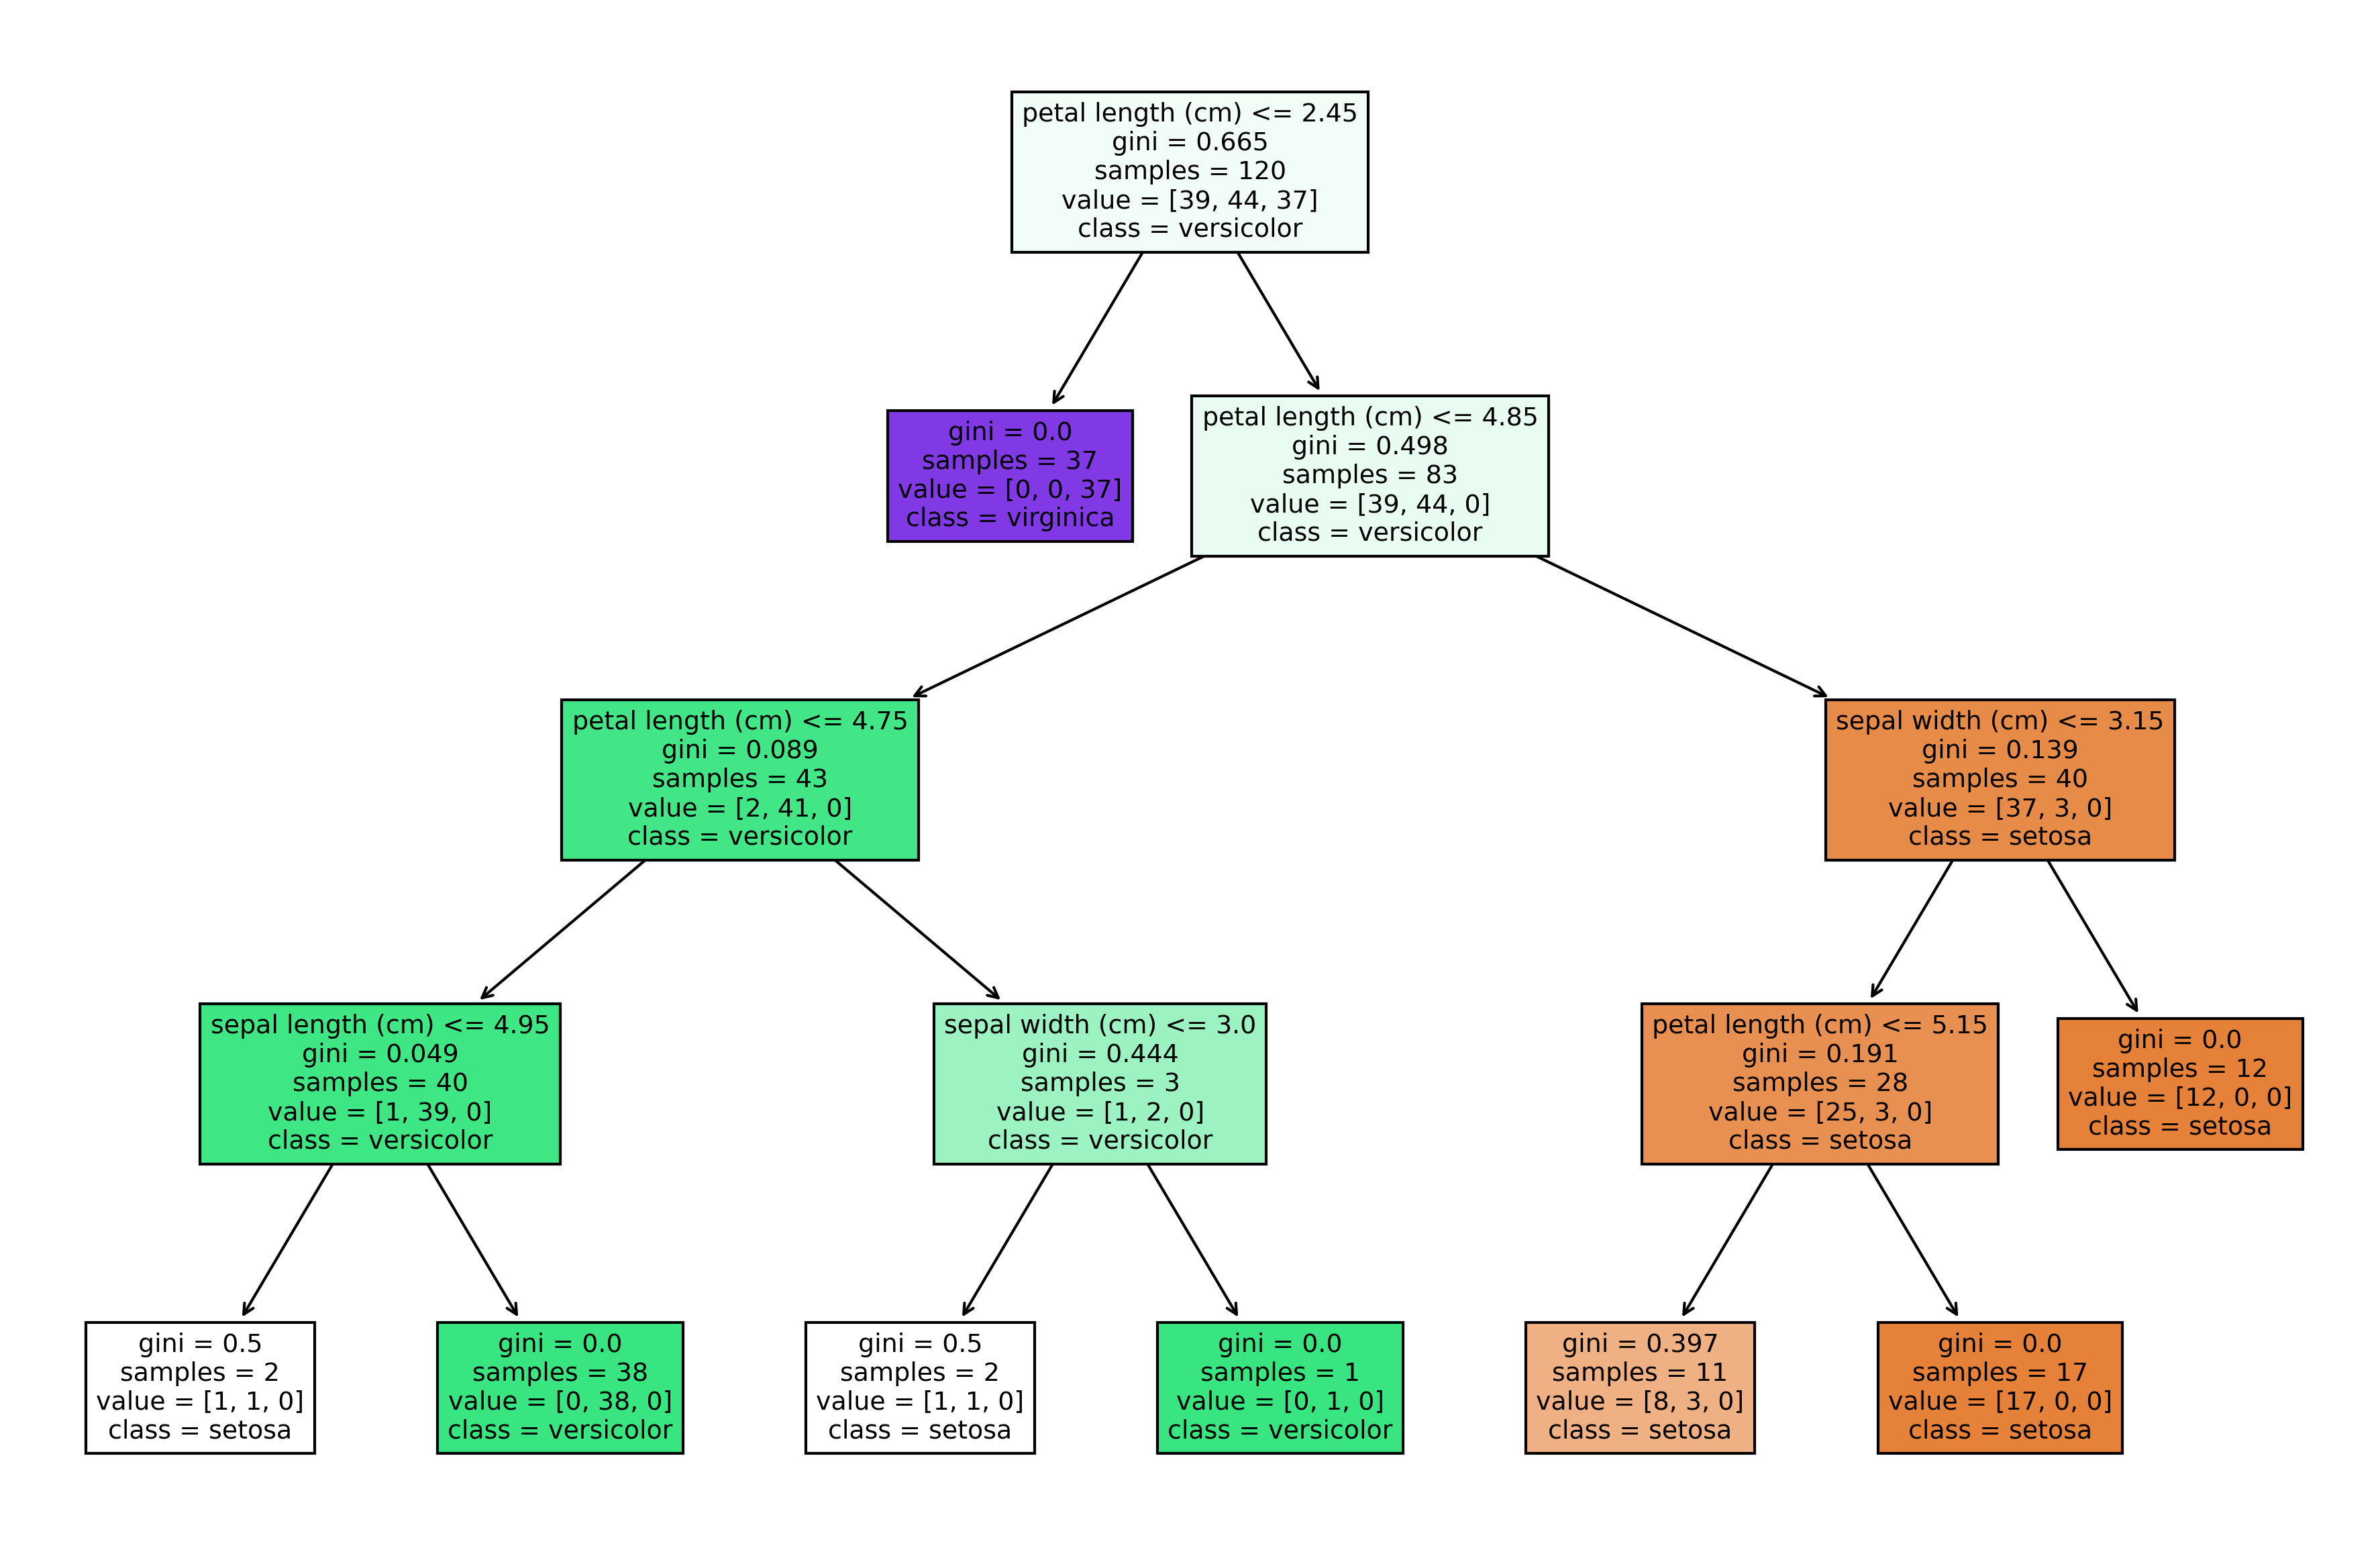

In [30]:
from sklearn import tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=300)
tree.plot_tree(clf_tree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')


**You can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.**

## **Conclusion:- Thus the above prediction was made using Decision Tree and the model's accuracy score can be seen above.**

# *THANK YOU*